# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
# Change the datetype of Date
df['Date'] = pd.to_datetime(df['Date'])

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


In [24]:
df['Reused'].sum()

37

### Success Rate

The landing success rate that spacex experienced, which was 66.67%, is the double of its failures (33.33%).

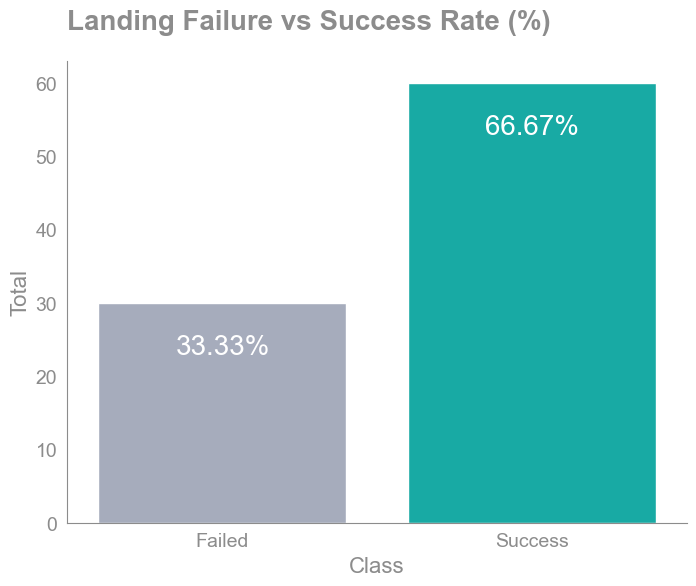

In [4]:
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=df, x='Class')
sns.despine()
ax.set_title('Landing Failure vs Success Rate (%)', fontsize=20, y=1.05, loc='left',
             color='#8C8C8C', fontweight='bold')
plt.xlabel('Class', fontsize=16, color='#8C8C8C')
plt.ylabel('Total', fontsize=16, color='#8C8C8C')
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')
ax.spines['bottom'].set_color('#8C8C8C')
ax.spines['left'].set_color('#8C8C8C')
xlabels = ['Failed', 'Success']
ax.set_xticklabels(xlabels)
plt.annotate("{:,.2f}".format(round(df.Class.value_counts(normalize=True)[0] * 100, 2)) + "%",
            xy=(-0.15, 23), fontsize=20, color="white")
plt.annotate("{:,.2f}".format(round(df.Class.value_counts(normalize=True)[1] * 100, 2)) + "%",
            xy=(0.85, 53), fontsize=20, color="white")

plt.show()

/Users/mikemusas/Documents/DataProjects/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


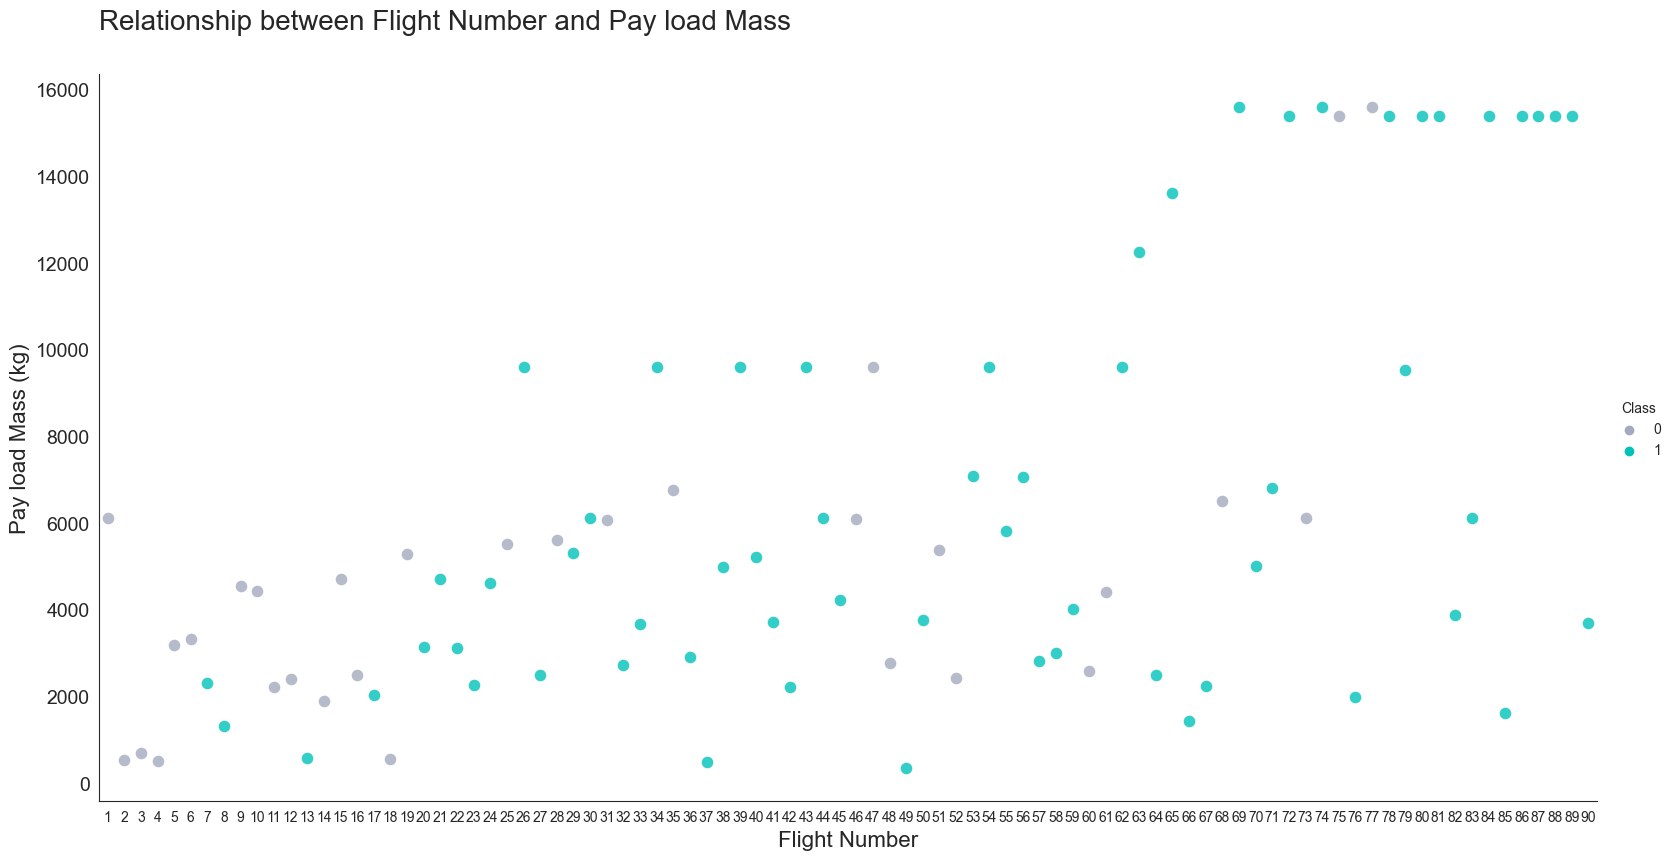

In [5]:
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data=df, height=8, aspect=2, s=70, alpha=0.8)
plt.title('Relationship between Flight Number and Pay load Mass', fontsize=20, y=1.05, loc='left')
plt.xlabel('Flight Number', fontsize=16)
plt.ylabel('Pay load Mass (kg)', fontsize=16)
plt.yticks(fontsize=14)

plt.show()

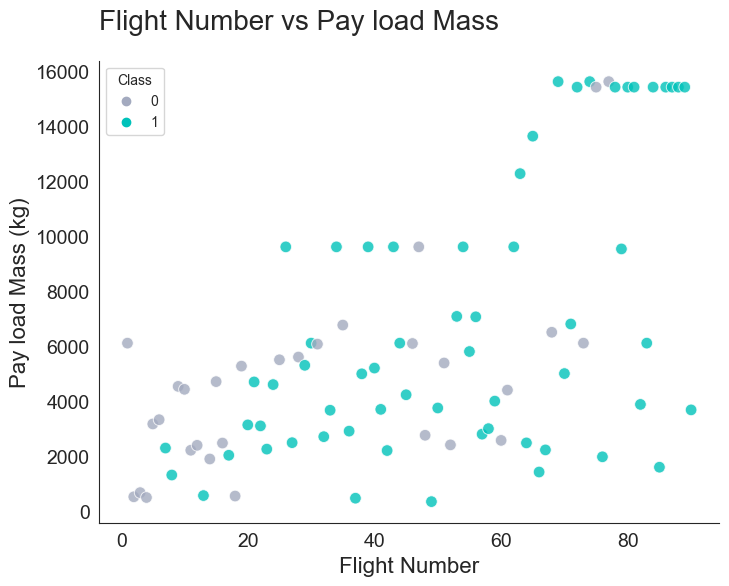

In [6]:
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, y='PayloadMass', x='FlightNumber', hue='Class', s=70, alpha=0.8)
sns.despine()
ax.set_title('Flight Number vs Pay load Mass', fontsize=20, y=1.05, loc='left')
plt.xlabel('Flight Number', fontsize=16)
plt.ylabel('Pay load Mass (kg)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77% each.


Next, let's drill down to each site visualize its detailed launch records.


### Total Number of Successes and Failed Landings & Their Rates

In [22]:
# Lists for storing the data about the launch sites successes and failures
launch_sites = list(df.LaunchSite.unique())
n_launch_success = []
n_launch_failure = []

for site in launch_sites:
    # Add the number of successful launches for the chosen site
    n_launch_success.append(len(df.loc[(df['LaunchSite'] == site) & (df['Class'] == 1)]))
    # Add the number of failed launches for the chose site
    n_launch_failure.append(len(df.loc[(df['LaunchSite'] == site) & (df['Class'] == 0)]))

# Create the dataframe   
launch_sites_data = pd.DataFrame({'LaunchSite': launch_sites,
                                  'n_success': n_launch_success,
                                  'n_failure': n_launch_failure})

# Display the data
launch_sites_data
    

,LaunchSite,n_success,n_failure
0,CCAFS SLC 40,33,22
1,VAFB SLC 4E,10,3
2,KSC LC 39A,17,5


In [8]:
# Group the success rate by launch site
success_by_launch_site = df.groupby('LaunchSite')[['Class']].mean().reset_index()
# Rename the column Class to success_rate
success_by_launch_site.rename(columns={'Class': 'success_rate'}, inplace=True)
# Create the column failure_rate
success_by_launch_site['failure_rate'] = 1 - success_by_launch_site['success_rate']
# Show the data
success_by_launch_site

,LaunchSite,success_rate,failure_rate
0,CCAFS SLC 40,0.600000,0.400000
1,KSC LC 39A,0.772727,0.227273
2,VAFB SLC 4E,0.769231,0.230769


In [39]:
# Merge the two data sets
launch_sites_data_merged = launch_sites_data.merge(success_by_launch_site, on='LaunchSite').sort_values('success_rate', ascending=True)
# Display the data
launch_sites_data_merged

,LaunchSite,n_success,n_failure,success_rate,failure_rate
0,CCAFS SLC 40,33,22,0.600000,0.400000
1,VAFB SLC 4E,10,3,0.769231,0.230769
2,KSC LC 39A,17,5,0.772727,0.227273


/var/folders/pb/_fq6py6n40x8n9_jp1pqrp0w0000gn/T/ipykernel_9533/3755983078.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


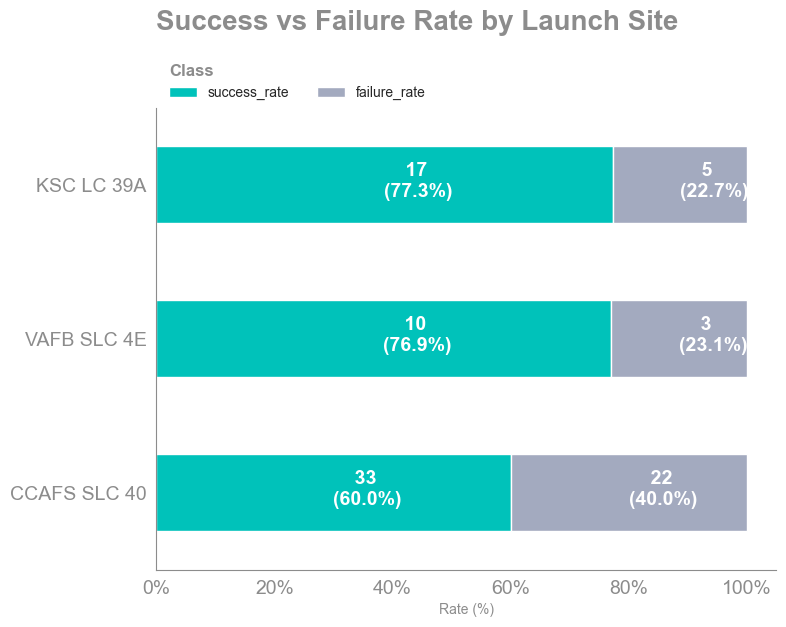

In [89]:

sns.set_style('white')
sns.set_palette(['#00C2BA', '#A3AABF'])

launch_sites_data_plot = launch_sites_data_merged[['LaunchSite', 'success_rate', 'failure_rate']]
launch_sites_data_plot.set_index('LaunchSite', inplace=True)
#
launch_sites_data_count = launch_sites_data_merged[['LaunchSite', 'n_success', 'n_failure']]
launch_sites_data_count.set_index('LaunchSite', inplace=True)
ax = launch_sites_data_plot.plot(kind='barh', stacked=True, figsize=(8, 6))
# Labels
xlabels = ['{}%'.format(round(x)) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)
sns.despine()
ax.spines['bottom'].set_color('#8C8C8C')
ax.spines['left'].set_color('#8C8C8C')
plt.title('Success vs Failure Rate by Launch Site', loc='left', fontsize=20, y=1.15, fontweight='bold',
          color='#8C8C8C')
plt.xlabel('Rate (%)', color='#8C8C8C')
plt.ylabel('')
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')

# Annotations
for n, x in enumerate([*launch_sites_data_plot.index.values]):
    for (proportion, count, y_loc) in zip(launch_sites_data_plot.loc[x],
                                          launch_sites_data_count.loc[x],
                                          launch_sites_data_plot.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.08,
                 s=f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=14,
                 fontweight="bold")

legend_object = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc="upper left", ncol=2, fontsize=10,
                           title='Class', title_fontsize=12, frameon=False)
legend_object._legend_box.align = 'left'
legend_title = legend_object.get_title()
legend_title.set_color('#8C8C8C')
legend_title.set_weight('bold')

plt.show()

In [71]:
np.linspace(0, 100, 6)

array([  0.,  20.,  40.,  60.,  80., 100.])

In [57]:
launch_sites_data_plot.loc

,success_rate,failure_rate
LaunchSite,,
CCAFS SLC 40,0.600000,0.400000
VAFB SLC 4E,0.769231,0.230769
KSC LC 39A,0.772727,0.227273


In [56]:
for n, x in enumerate([*launch_sites_data_plot]):
    for proportion in launch_sites_data_plot.loc[x]:
        print(f'n: {n}, x: {x}, proportion: {proportion}')

KeyError: 'success_rate'

### TASK 1: Visualize the relationship between Flight Number and Launch Site

/Users/mikemusas/Documents/DataProjects/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


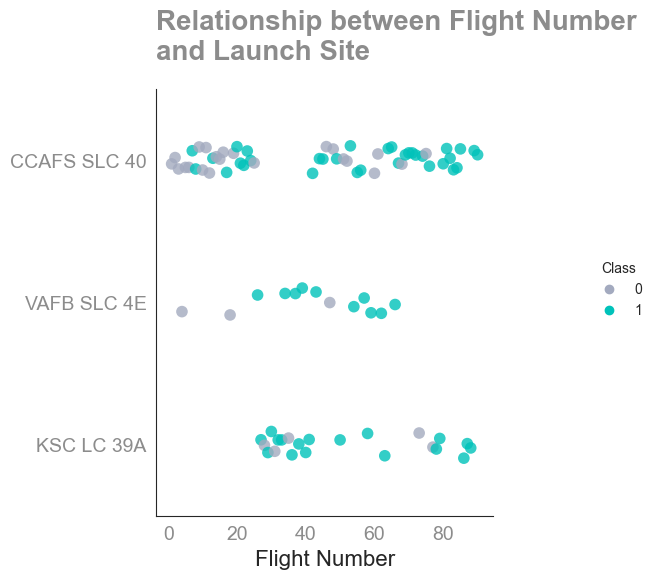

In [9]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

ax = sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', aspect=1, s=70, alpha=0.8)
sns.despine()
plt.title('Relationship between Flight Number \nand Launch Site', fontsize=20, y=1.05, loc='left', fontweight='bold',
          color='#8C8C8C')
plt.xlabel('Flight Number', fontsize=16)
plt.ylabel('')
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')

plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


### Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

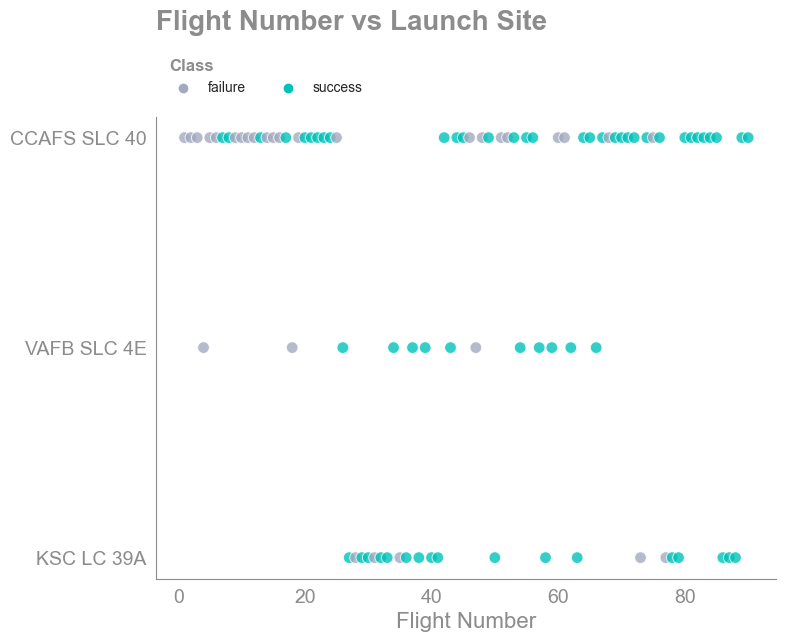

In [97]:
# Plot a scatter point chart with x-axis to be Flight Number and y-axis to be the launch site, and hue to be the class value
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', s=70, alpha=0.8)
sns.despine()
ax.set_title('Flight Number vs Launch Site', fontsize=20, y=1.17, loc='left',
             color='#8C8C8C', fontweight='bold')
plt.xlabel('Flight Number', fontsize=16, color='#8C8C8C')
plt.ylabel('')
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')
ax.spines['bottom'].set_color('#8C8C8C')
ax.spines['left'].set_color('#8C8C8C')

legend_object = plt.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc="upper left", ncol=2, fontsize=10,
                           title='Class', title_fontsize=12, frameon=False)
legend_object._legend_box.align = 'left'
legend_title = legend_object.get_title()
legend_title.set_color('#8C8C8C')
legend_title.set_weight('bold')
legend_object.get_texts()[0].set_text('failure')
legend_object.get_texts()[1].set_text('success')

plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.

**Answer**
As the number of flights increases for The CCAFS SLC 40 launch site, the number of successful landings increases as well. This goes for all the launch sites. We can observe a decrease in the number of failed landings.

### TASK 2: Visualize the relationship between Payload and Launch Site

/Users/mikemusas/Documents/DataProjects/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


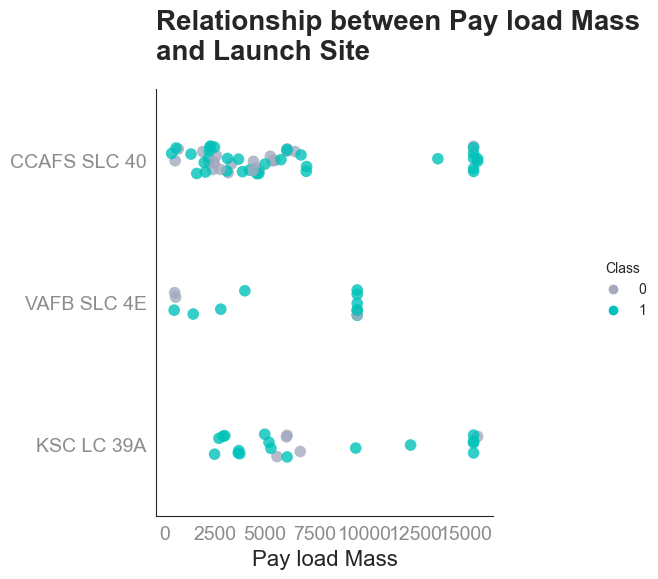

In [10]:
### TASK 2: Visualize the relationship between Payload and Launch Site
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

sns.catplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', s=70, alpha=0.8)
sns.despine()
plt.title('Relationship between Pay load Mass \nand Launch Site', fontsize=20, y=1.05, loc='left',
          fontweight='bold')
plt.ylabel('')
plt.xlabel('Pay load Mass', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')

plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.

**Answer**
There is no much different in Payload mass for CCAFS SLC 40 launch site. However, we observe that three of launches with the highest payload were successful.

### Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

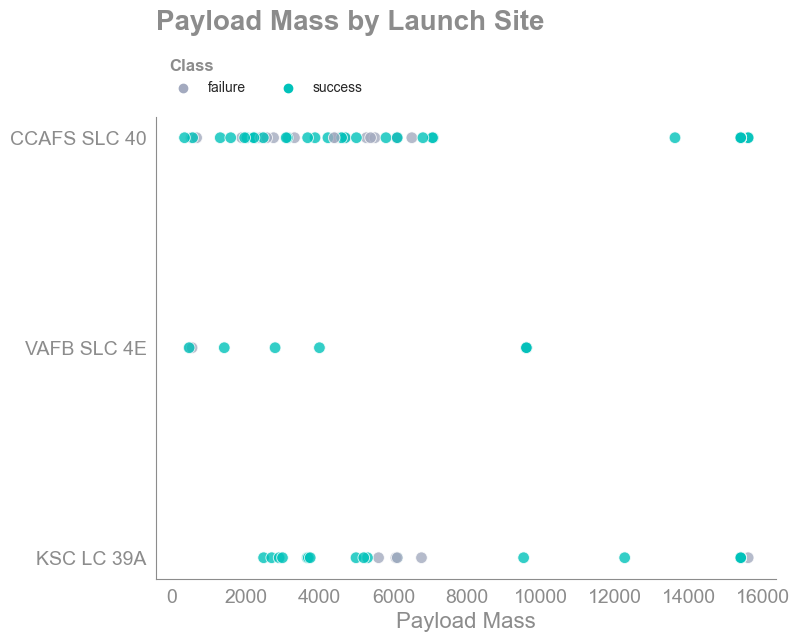

In [99]:
# Plot a scatter point chart with x-axis to be Pay Load Mass (kg) and y-axis to be the launch site, and hue to be the class value
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', s=70, alpha=0.8)

sns.despine()
ax.set_title('Payload Mass by Launch Site', fontsize=20, y=1.17, loc='left',
             color='#8C8C8C', fontweight='bold')
plt.xlabel('Payload Mass', fontsize=16, color='#8C8C8C')
plt.ylabel('')
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')
ax.spines['bottom'].set_color('#8C8C8C')
ax.spines['left'].set_color('#8C8C8C')

legend_object = plt.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc="upper left", ncol=2, fontsize=10,
                           title='Class', title_fontsize=12, frameon=False)
legend_object._legend_box.align = 'left'
legend_title = legend_object.get_title()
legend_title.set_color('#8C8C8C')
legend_title.set_weight('bold')
legend_object.get_texts()[0].set_text('failure')
legend_object.get_texts()[1].set_text('success')

plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK 3: Visualize the relationship between success rate of each orbit type

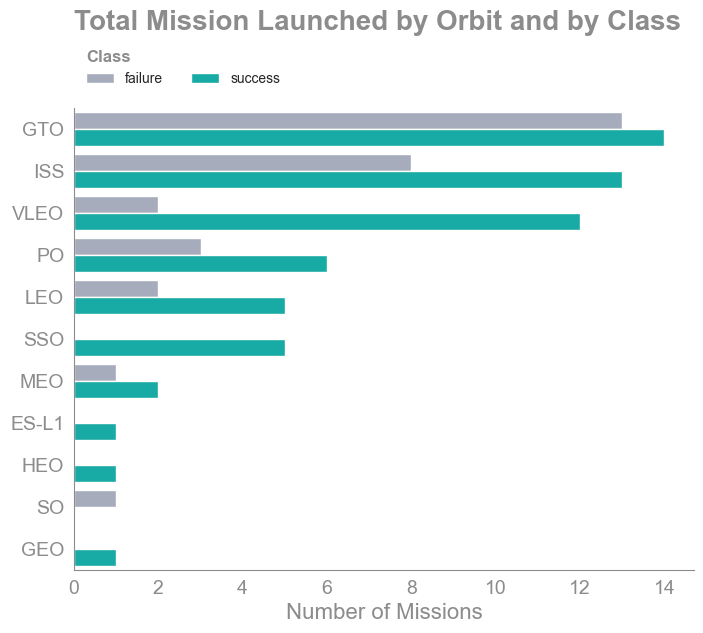

In [111]:
### TASK 3: Visualize the relationship between success rate of each orbit type
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.countplot(data=df, y='Orbit', hue='Class', order=df.Orbit.value_counts(ascending=False).index)
sns.despine()
ax.set_title('Total Mission Launched by Orbit and by Class', loc='left', fontsize=20, fontweight='bold',
             y=1.15, color='#8C8C8C')

plt.xlabel('Number of Missions', fontsize=16, color='#8C8C8C')
plt.ylabel('')
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')
ax.spines['bottom'].set_color('#8C8C8C')
ax.spines['left'].set_color('#8C8C8C')

legend_object = plt.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc="upper left", ncol=2, fontsize=10,
                           title='Class', title_fontsize=12, frameon=False)
legend_object._legend_box.align = 'left'
legend_title = legend_object.get_title()
legend_title.set_color('#8C8C8C')
legend_title.set_weight('bold')
legend_object.get_texts()[0].set_text('failure')
legend_object.get_texts()[1].set_text('success')

plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [103]:
orbit_success_rate = df.groupby('Orbit')[['Class']].mean().sort_values('Class', ascending=False).reset_index()
orbit_success_rate

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,HEO,1.000000
3,SSO,1.000000
4,VLEO,0.857143
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,ISS,0.619048
9,GTO,0.518519


/var/folders/pb/_fq6py6n40x8n9_jp1pqrp0w0000gn/T/ipykernel_9533/3423542120.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


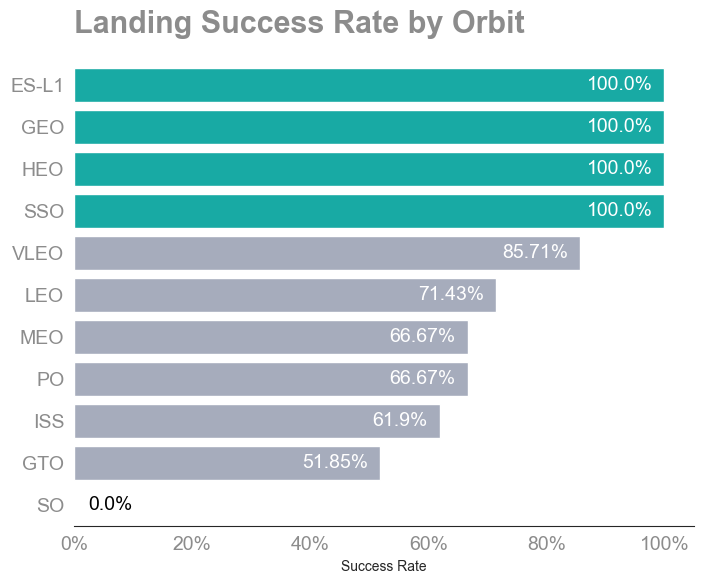

In [110]:

sns.set_style('white')
sns.set_palette(['#00C2BA', '#00C2BA', '#00C2BA', '#00C2BA',
                 '#A3AABF', '#A3AABF', '#A3AABF', '#A3AABF',
                 '#A3AABF', '#A3AABF', '#A3AABF'])

fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(data=orbit_success_rate, y='Orbit', x='Class')
sns.despine()
ax.spines['left'].set_visible(False)
ax.set_title('Landing Success Rate by Orbit', loc='left', fontsize=22, y=1.05,
             fontweight='bold', color='#8C8C8C')
plt.xlabel('Success Rate')
plt.ylabel('')
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')
xlabels = ['{}%'.format(round(x)) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

for i in range(0, len(orbit_success_rate.index)-1):
    plt.text(orbit_success_rate.Class[i]-0.02, i,
             "{}%".format(round(orbit_success_rate.Class[i]*100, 2)),
             ha='right', va='center', fontsize=14, color='white')
    
plt.text(orbit_success_rate.Class[10]+0.1, 10,
         '0.0%', ha='right', va='center', fontsize=14, color='black')

plt.show()

Analyze the plotted bar chart try to find which orbits have high success rate.


### TASK 4: Visualize the relationship between FlightNumber and Orbit type

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'LEO'),
  Text(0, 1, 'ISS'),
  Text(0, 2, 'PO'),
  Text(0, 3, 'GTO'),
  Text(0, 4, 'ES-L1'),
  Text(0, 5, 'SSO'),
  Text(0, 6, 'HEO'),
  Text(0, 7, 'MEO'),
  Text(0, 8, 'VLEO'),
  Text(0, 9, 'SO'),
  Text(0, 10, 'GEO')])

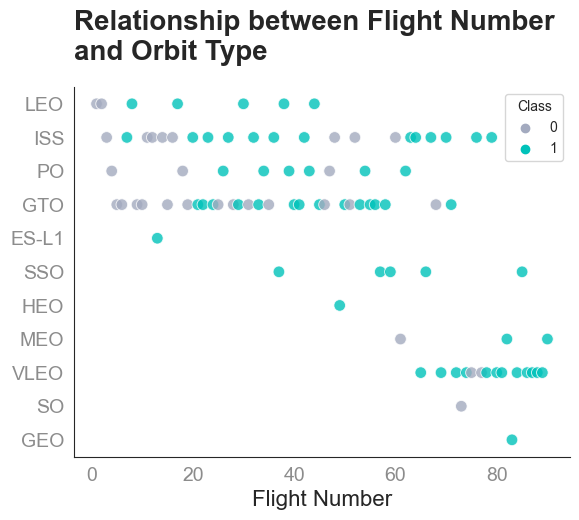

In [15]:
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', s=70, alpha=0.8)
sns.despine()
plt.title('Relationship between Flight Number \nand Orbit Type', fontsize=20, y=1.05, loc='left',
          fontweight='bold')
plt.ylabel('')
plt.xlabel('Flight Number', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')

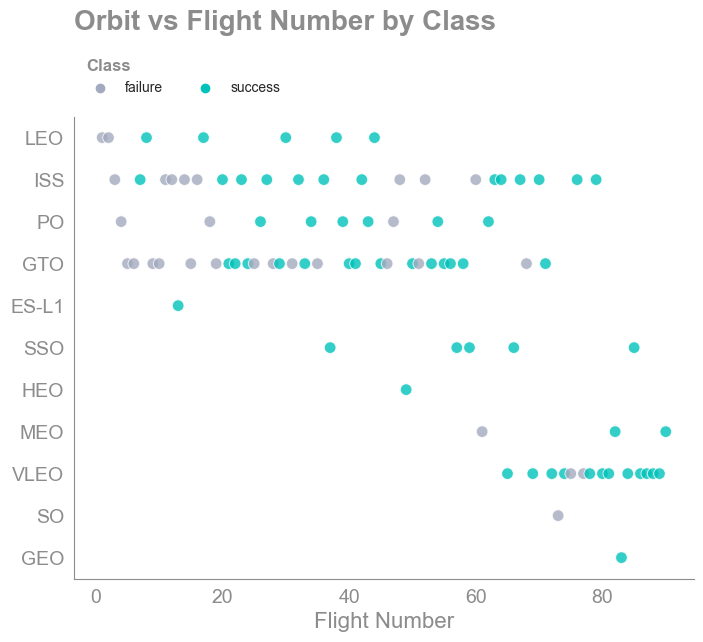

In [113]:
### TASK 4: Visualize the relationship between FlightNumber and Orbit type
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', s=70, alpha=0.8)
sns.despine()
ax.set_title('Orbit vs Flight Number by Class', fontsize=20, y=1.17, loc='left',
             color='#8C8C8C', fontweight='bold')
plt.xlabel('Flight Number', fontsize=16, color='#8C8C8C')
plt.ylabel('')
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')
ax.spines['bottom'].set_color('#8C8C8C')
ax.spines['left'].set_color('#8C8C8C')

legend_object = plt.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc="upper left", ncol=2, fontsize=10,
                           title='Class', title_fontsize=12, frameon=False)
legend_object._legend_box.align = 'left'
legend_title = legend_object.get_title()
legend_title.set_color('#8C8C8C')
legend_title.set_weight('bold')
legend_object.get_texts()[0].set_text('failure')
legend_object.get_texts()[1].set_text('success')

plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


### Plot a scatter point chart with x-axis to be FlightNumber and y-axis to be the Orbit, and hue to be the class value

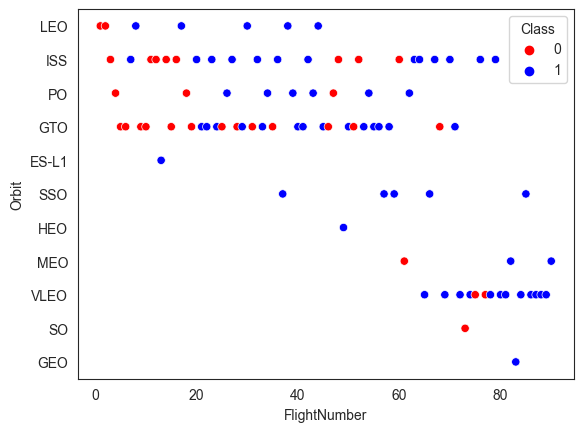

In [62]:
# Plot a scatter point chart with x-axis to be FlightNumber and y-axis to be the Orbit, and hue to be the class value
sns.set_palette(['red', 'blue'])
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK 5: Visualize the relationship between Payload and Orbit type

/Users/mikemusas/Documents/DataProjects/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


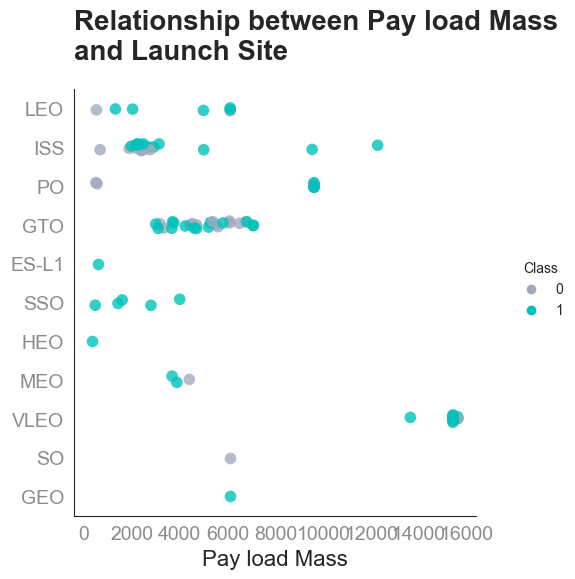

In [12]:
### TASK 5: Visualize the relationship between Payload and Orbit type
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

sns.catplot(data=df, x='PayloadMass', y='Orbit', hue='Class', s=70, alpha=0.8)
sns.despine()
plt.title('Relationship between Pay load Mass \nand Launch Site', fontsize=20, y=1.05, loc='left',
          fontweight='bold')
plt.ylabel('')
plt.xlabel('Pay load Mass', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')

plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


### Plot a scatter point chart with x-axis to be Payload and y-axis to be the Orbit, and hue to be the class value

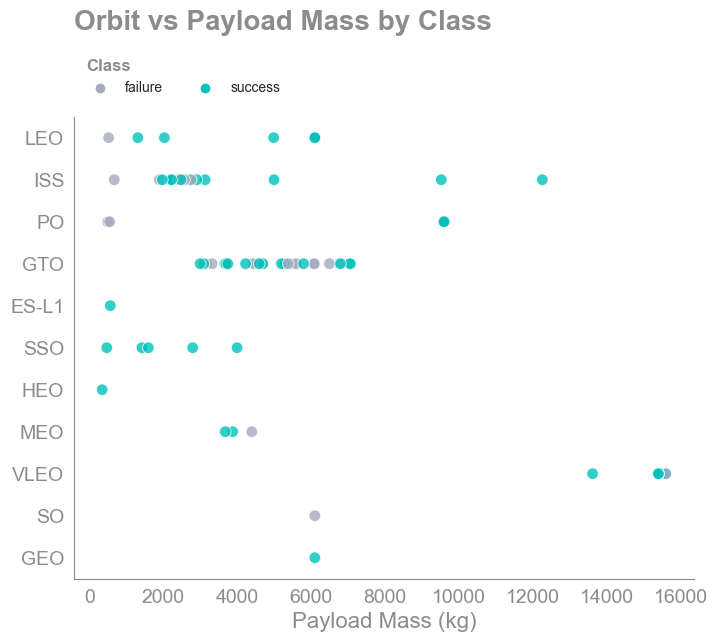

In [14]:
# Plot a scatter point chart with x-axis to be Payload and y-axis to be the Orbit, and hue to be the class value
sns.set_style('white')
sns.set_palette(['#A3AABF', '#00C2BA'])

fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', s=70, alpha=0.8)
sns.despine()
ax.set_title('Orbit vs Payload Mass by Class', fontsize=20, y=1.17, loc='left',
             color='#8C8C8C', fontweight='bold')
plt.xlabel('Payload Mass (kg)', fontsize=16, color='#8C8C8C')
plt.ylabel('')
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')
ax.spines['bottom'].set_color('#8C8C8C')
ax.spines['left'].set_color('#8C8C8C')

legend_object = plt.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc="upper left", ncol=2, fontsize=10,
                           title='Class', title_fontsize=12, frameon=False)
legend_object._legend_box.align = 'left'
legend_title = legend_object.get_title()
legend_title.set_color('#8C8C8C')
legend_title.set_weight('bold')
legend_object.get_texts()[0].set_text('failure')
legend_object.get_texts()[1].set_text('success')

plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

### TASK 6: Visualize the launch success yearly trend

In [6]:
### TASK 6: Visualize the launch success yearly trend
df_for_group = df[['Date', 'Class']]
df_for_group = pd.pivot_table(df_for_group, index=[df_for_group.Date.dt.year], columns=['Class'], aggfunc='count').reset_index()

In [7]:
# Making one level for the columns
df_for_group.columns = df_for_group.columns.droplevel(0)
# Renaming the columns
df_for_group.rename(columns={'': 'year', 0: 'failed_mission', 1: 'success_mission'}, inplace=True)
# Fill in the missing values
df_for_group.fillna(0.0, inplace=True)


In [10]:
df_for_group

Class,year,failed_mission,success_mission
0,2010,1.0,0.0
1,2012,1.0,0.0
2,2013,3.0,0.0
3,2014,4.0,2.0
4,2015,4.0,2.0
5,2016,3.0,5.0
6,2017,3.0,15.0
7,2018,7.0,11.0
8,2019,1.0,9.0
9,2020,3.0,16.0


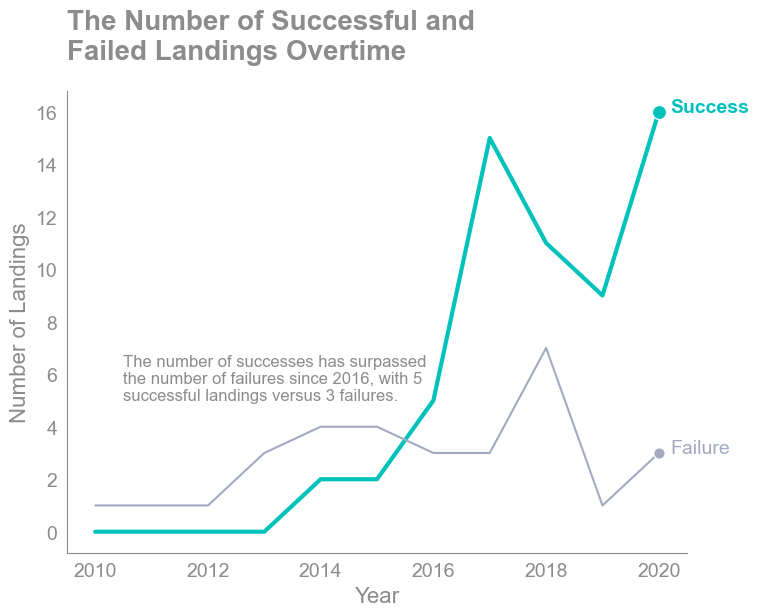

In [41]:
### TASK 6: Visualize the launch success yearly trend
sns.set_style('white')
sns.set_palette(['#00C2BA', '#A3AABF'])

fig, ax = plt.subplots(figsize=(8, 6))
# Line plot for success missions
sns.lineplot(df_for_group, x='year', y='success_mission', linewidth=3,
             marker='o', ms=10, markevery=[-1, -1])
# Line plot for failed missions
sns.lineplot(df_for_group, x='year', y='failed_mission',
             marker='o', ms=8, markevery=[-1, -1])
sns.despine()
ax.set_title('The Number of Successful and \nFailed Landings Overtime', loc='left',
             fontsize=20, y=1.05, fontweight='bold', color='#8C8C8C')
plt.xlabel('Year', fontsize=16, color='#8C8C8C')
plt.ylabel('Number of Landings', fontsize=16, color='#8C8C8C')
plt.xticks(fontsize=14, color='#8C8C8C')
plt.yticks(fontsize=14, color='#8C8C8C')
ax.spines['bottom'].set_color('#8C8C8C')
ax.spines['left'].set_color('#8C8C8C')
# The number of success has surpassed the number of failure since 2016
# with 5 success landings versus 3 failures.
# Annotations
plt.annotate("Success", xy=(2020.2, 16), fontsize=14, fontweight='bold', color='#00C2BA')
plt.annotate("Failure", xy=(2020.2, 3), fontsize=14, color='#A3AABF')
# More annotations
plt.annotate("The number of successes has surpassed \nthe number of failures since 2016, with 5 \nsuccessful landings versus 3 failures.",
             xy=(2010.5, 5), fontsize=12, color='#8C8C8C')

plt.show()

You can plot a line chart with x-axis to be <code>Year</code> and y-axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:


In [8]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

AttributeError: 'Timestamp' object has no attribute 'split'

In [108]:
df['Year'] = df.Date.dt.year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [110]:
# Plot a line chart with x-axis to be the extracted year and y-axis to be the success rate
success_rate_by_year = df.groupby('Year')[['Class']].mean().reset_index()
success_rate_by_year

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


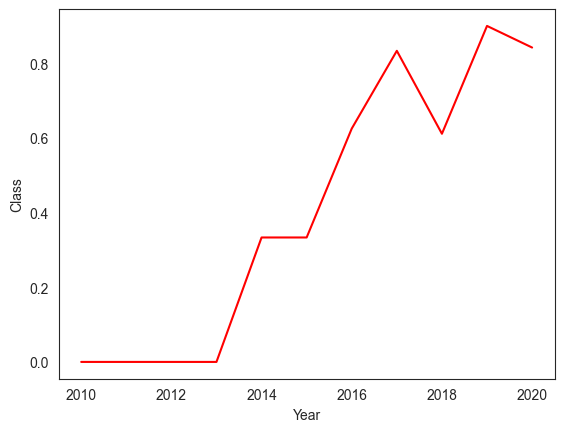

In [111]:
sns.lineplot(data=success_rate_by_year, x='Year', y='Class')
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [112]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [113]:
### TASK 7: Create dummy variables to categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [114]:
### TASK 8: Cast all numeric columns to `float64`
features_one_hot = features_one_hot.astype('float')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [116]:
features_one_hot.to_csv('dataset_part_3_csv', index=False)

In [117]:
features_one_hot.shape

(90, 76)

In [114]:
dr = pd.read_csv('https://raw.githubusercontent.com/musasmike/Analytics_Final_project/main/spacex_launch_dash.csv')
dr.head()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>